# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
import json
import re


sys.path.append('../scripts')
from pickle_file_handlers import HandlePickle
from cleaner import CleanDataFrame
from plotter import Plotter
from logger import logger
from db_api import Database_api

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cleaner = CleanDataFrame()
db_api = Database_api()
plotter = Plotter()
pickle_handler = HandlePickle()

# Get Data from Using our API

In [4]:
warehouse = db_api.get_db_data_from_table_name('mlready_warehouse')

2022-08-10 17:01:09,430:logger:successfully fetched the data


In [5]:
warehouse

,campaign_id,game_key,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,buy_rate_cpe,volume_agreed,gross_costbudget,agency_fee,percentage,net_cost,row_num,ER,CTR,TR
0,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
1,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
2,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
3,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
4,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422222,rom3zao,3c741855acd9576b4e311d5cd990ae77/ce493e9ed768f...,impression,300.0,250.0,b385e5s9,ca74860c-fa94-425b-b51a-9ef28ae7279e,2021-02-08 18:17:49.721000+00:00,United States,afk.guide,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422223,rom3zao,ccce5533b26203d07100376c394951a6/e69efe69bb576...,impression,300.0,250.0,s54usm6e,19618aa3-af95-44f2-beea-06958d0af730,2021-02-08 18:17:50.782000+00:00,United States,www.acommunaltable.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422224,rom3zao,676e0507f9e1ed8fa6880eafcf91547b/fee75db580219...,impression,300.0,250.0,aydslxzq,347bde1b-1b7b-4adf-8603-0dd1954466ee,2021-02-08 18:17:51.290000+00:00,United States,g1.globo.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422225,rom3zao,38534b16ec1e64274db67b5de478c86d/1184b78ee9795...,impression,300.0,250.0,18mljlwy,2440c057-02e7-4440-bcfb-15b113d1df18,2021-02-08 18:17:52.325000+00:00,United States,www.foxnews.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029


In [8]:
warehouse_df = warehouse.copy()
warehouse_df.drop(columns=["row_num"], inplace=True)

### plot some charts to show the data values

2022-08-10 17:02:05,669:logger:successfully displayed count plot


<module 'matplotlib.pyplot' from '/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

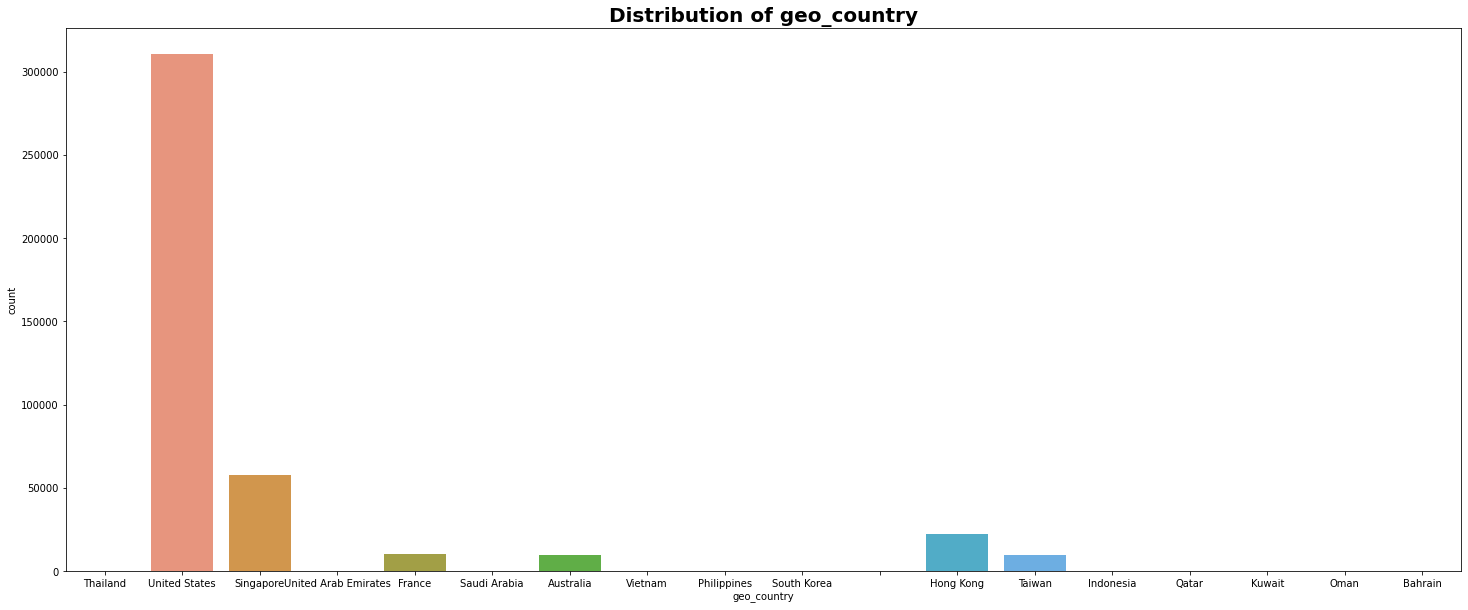

In [9]:
plotter.plot_count(warehouse_df , 'geo_country')

<AxesSubplot:title={'center':'Top 10 Site for Impression'}>

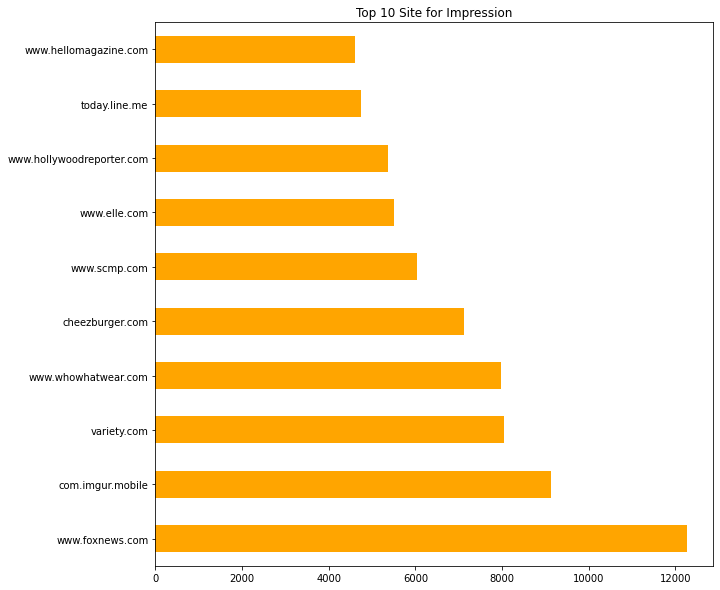

In [10]:
site = warehouse_df['site_name'].value_counts()
site.head(10).plot(kind="barh", figsize=(10,10), color='orange', title='Top 10 Site for Impression')

<AxesSubplot:title={'center':'Top 10 Site for Impression'}>

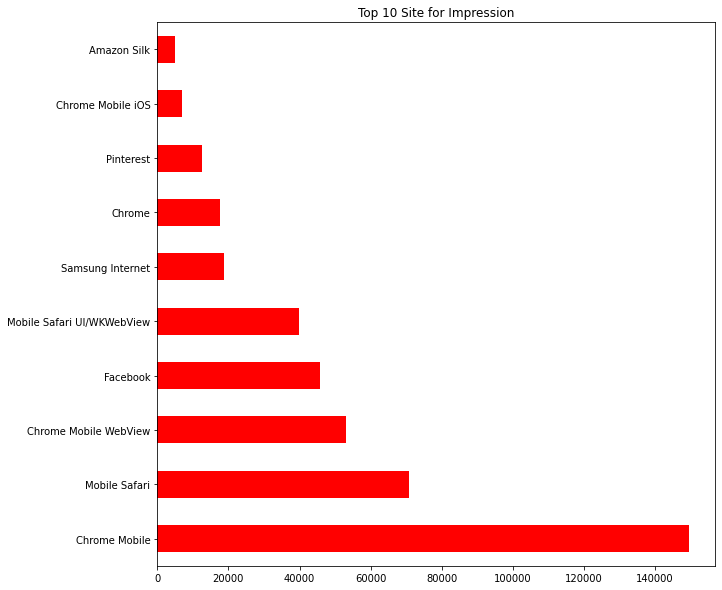

In [11]:
browser = warehouse_df['browser'].value_counts()
browser.head(10).plot(kind="barh", figsize=(10,10), color='red', title='Top 10 Browsers for Impression')

# Analyze site_name and type name data with respect to kpi performance   

In [35]:
site_df = warehouse_df.groupby(['site_name','type'])['type'].agg(count='count').reset_index() 
campaigns = list(site_df['site_name'].unique())
site_df

,site_name,type,count
0,0.triplelift.site-not-provided,impression,4
1,100krecipes.com,first_dropped,2
2,100krecipes.com,impression,19
3,1032443533,impression,1
4,1035kissfmboise.com,impression,5
...,...,...,...
18235,zula.sg,first_dropped,2
18236,zula.sg,impression,22
18237,zwiftinsider.com,impression,20
18238,zygomatic.arkadiumarena.com,impression,5


In [39]:
# get campaign kpi performance 
full_campaign_kpi = []
for c in campaigns:
   
    types = list(site_df[site_df['site_name'] == c]['type'])
    ctr = 0
    er = 0
    tr = 0
    if 'impression' in types:
        impression_count = list(site_df.query(f" site_name == '{c}' and type == 'impression'")['count'])[0]
        if 'first_dropped' in types:
            first_dropped_count = list(site_df.query(f" site_name == '{c}' and type == 'first_dropped'")['count'])[0]
            er = (first_dropped_count/impression_count) * 100
        if 'click-through-event' in types:
            click_through_event_count = list(site_df.query(f" site_name == '{c}' and type == 'click-through-event'")['count'])[0]
            ctr = (click_through_event_count/impression_count) * 100
          
    tr = (er+ctr)/2
    full_campaign_kpi.append([c,er,ctr,tr])
full_campaign_kpi

[['0.triplelift.site-not-provided', 0, 0, 0.0],
 ['100krecipes.com', 10.526315789473683, 0, 5.263157894736842],
 ['1032443533', 0, 0, 0.0],
 ['1035kissfmboise.com', 0, 0, 0.0],
 ['103gbfrocks.com', 0, 0, 0.0],
 ['1057889290', 0, 0, 0.0],
 ['1059939751', 0, 0, 0.0],
 ['1061evansville.com', 0, 0, 0.0],
 ['1063thebuzz.com', 0, 0, 0.0],
 ['1064003182', 0, 0, 0.0],
 ['1066752474', 1.0714285714285714, 0.35714285714285715, 0.7142857142857143],
 ['1073936461', 0, 0, 0.0],
 ['1073kissfmtexas.com', 0, 0, 0.0],
 ['1075zoofm.com', 0, 0, 0.0],
 ['1078160821', 0, 0, 0.0],
 ['1078297893', 0, 0, 0.0],
 ['1079ishot.com', 0, 0, 0.0],
 ['1083451870', 0, 0, 0.0],
 ['1084662006', 40.0, 0, 20.0],
 ['1086379636', 0, 0, 0.0],
 ['1092689152', 50.0, 0, 25.0],
 ['10beasts.com', 0, 0, 0.0],
 ['10faq.com', 0, 0, 0.0],
 ['10fastfingers.com', 0, 0, 0.0],
 ['10scopes.com', 0, 0, 0.0],
 ['1101622812', 0, 0, 0.0],
 ['1121895111', 0, 0, 0.0],
 ['1140186382', 0, 0, 0.0],
 ['1159705605', 6.666666666666667, 0, 3.3333333333

In [41]:
dataframe = pd.DataFrame(full_campaign_kpi,columns=['site_name','ER' , 'CTR', 'TR'])
dataframe

,site_name,ER,CTR,TR
0,0.triplelift.site-not-provided,0.000000,0.0,0.000000
1,100krecipes.com,10.526316,0.0,5.263158
2,1032443533,0.000000,0.0,0.000000
3,1035kissfmboise.com,0.000000,0.0,0.000000
4,103gbfrocks.com,0.000000,0.0,0.000000
...,...,...,...,...
12180,zonecoverage.com,0.000000,0.0,0.000000
12181,zula.sg,9.090909,0.0,4.545455
12182,zwiftinsider.com,0.000000,0.0,0.000000
12183,zygomatic.arkadiumarena.com,0.000000,0.0,0.000000


In [48]:
dataframe.sort_values(by='TR', ascending=False).head(20)

,site_name,ER,CTR,TR
1339,com.bling.bitcoinfoodfight,100.000000,700.0,400.000000
481,allaboutthegloss.com,100.000000,400.0,250.000000
4001,merryboosters.com,100.000000,400.0,250.000000
11039,www.tastythais.com,100.000000,400.0,250.000000
7325,www.capitalgazette.com,100.000000,350.0,225.000000
9400,www.magneticmag.com,100.000000,300.0,200.000000
6296,twinmomrefreshed.com,100.000000,300.0,200.000000
1994,dianalegacy.com,100.000000,300.0,200.000000
5449,sportsnaut.com,100.000000,300.0,200.000000
239,353665650,100.000000,300.0,200.000000


As we can see the Engagment rate doesn't pass the value 100 %. However, CTR goes above 100 which shows that click through events occur more than impression meaning the Advertisments are interactive have recorded multiple time. So if we want to get the correct CTR's we need to aggregate using customer as well.  

# Getting Features most correlated to KPI performances

In [7]:
def label_encoder(x):
    try:
        lb = LabelEncoder()
        cat_cols = CleanDataFrame.get_categorical_columns(x)
        for col in cat_cols:
            x[col] = lb.fit_transform(x[col])
    except Exception as e:
        logger.error(e)
    return x

In [8]:
warehouse_df = label_encoder(warehouse_df)

2022-08-10 09:16:46,206:logger:successfully got catagorical columns


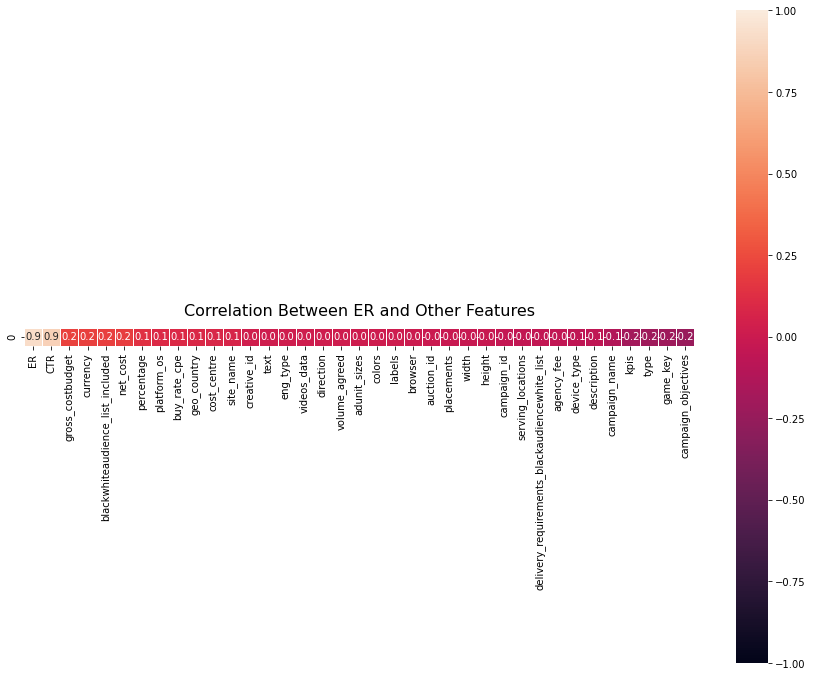

In [12]:
plot = plotter.plot_corr_heatmap_one_against_all(warehouse_df,'TR')

In [ ]:
selected_features = ['gross_costbudget' , 'currency' , 'blackwhiteaudience_list','net_cost', 'percentage' , 'platform_os' , "buy_rate_cpe" , "geo_country" , "cost_center" , "site_name"]